<a href="https://colab.research.google.com/github/sarwari-mallela/Cars-Dataset-Prediction-ML/blob/main/Data_Prep_Final_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents


>[ASSIGNMENT 04_02 EDA and Data Preparation](#scrollTo=625fc59b)

>>>[Importing Libraries](#scrollTo=bkrxlU1SmUEQ)

>>>[Importing and translating dataset](#scrollTo=07abff34)

>>>[Exploring data types](#scrollTo=28bb117b)

>>>[Dealing with missing values](#scrollTo=9203cf7c)

>>>[Data type conversion](#scrollTo=6b15711a)

>>>[Dealing with Outliers](#scrollTo=981141e0)

>>>[Correlation Matrix](#scrollTo=2e295104)

>>>[Data scaling](#scrollTo=944f8825)

>>>[Questions:](#scrollTo=d67ef963)

>>>[Converting categorical variables into numerical variables](#scrollTo=4c28cd03)

>>>[Exploring categorical varaibles](#scrollTo=4QR5q-jSHkY6)

>>>>[Exploring fuel column](#scrollTo=oHLqyJdOq6bO)

>>>>[Exploring brand column](#scrollTo=aCU0qcre0GAF)

>>>>[Exploring drive column](#scrollTo=ChS1fnXkxfUQ)

>>>>[Conversion of categorical variables into dummies](#scrollTo=4a10b7a9)

>>>[Recieving the final dataframe and saving as csv](#scrollTo=dkMielMvzIoO)

>[Summary and Conclusion](#scrollTo=ILjvJYDAuoyI)

>[ML Tasks Candidates Based on Our EDA](#scrollTo=3uwpAAePvBV_)



# ASSIGNMENT 04_02 EDA and Data Preparation

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Importing and translating dataset

In [ ]:
df = pd.read_csv('cars_2021_raw.csv')
# printing the dimensions of our data
print(df.shape)
# printing column names
print(df.columns)

(5379, 27)
Index(['ID#', 'BRAND', 'MODEL', 'VERSION1', 'POTENCIA1 (cv)', 'PUERTAS',
       'COMBUSTIBLE', 'CO2', 'PRECIO', 'Tracción', 'Transmisión',
       'Emisiones CO2 (gr/km)', 'Autonomía (km)', 'Consumo (l/100km)',
       'Garantía (meses)', 'Motor (cc)', 'Capacidad depósito (lts)',
       'N° marchas', 'Velocidad Máxima (km/h)', 'Aceleración (0-100 km) (s)',
       'Revoluciones Potencia Máxima (rpm)', 'Par motor (Nm)', 'Carrocería',
       'Peso (kg)', 'Largo (mm)', 'Ancho (mm)', 'Alto (mm)'],
      dtype='object')


In [ ]:
# translating columns into english for ease
df = df.rename(columns={
    'ID#':'id',
    'BRAND':'brand',
      'MODEL':'model', 'VERSION1':'version_1', 'POTENCIA1 (cv)':'power_1', 'PUERTAS':'doors',
       'COMBUSTIBLE':'fuel', 'CO2':'co2', 'PRECIO':'price', 'Tracción':'drive', 'Transmisión':'transmission',
       'Emisiones CO2 (gr/km)':'co2_emissions', 'Autonomía (km)':'autonomy', 'Consumo (l/100km)':'consumption',
       'Garantía (meses)':'warranty_months', 'Motor (cc)':'motor_cc', 'Capacidad depósito (lts)':'tank_capacity_litres',
       'N° marchas':'numberof_gears', 'Velocidad Máxima (km/h)':'max_speed_kmph', 'Aceleración (0-100 km) (s)':'acceleration',
       'Revoluciones Potencia Máxima (rpm)':'max_power_revolutions', 'Par motor (Nm)':'torque', 'Carrocería':'body_work',
       'Peso (kg)':'weight', 'Largo (mm)':'length', 'Ancho (mm)':'width', 'Alto (mm)':'height'
})

### Exploring data types

In [ ]:
df.dtypes

id                         int64
brand                     object
model                     object
version_1                 object
power_1                    int64
doors                      int64
fuel                      object
co2                       object
price                     object
drive                     object
transmission              object
co2_emissions            float64
autonomy                 float64
consumption              float64
warranty_months          float64
motor_cc                 float64
tank_capacity_litres     float64
numberof_gears           float64
max_speed_kmph           float64
acceleration             float64
max_power_revolutions    float64
torque                   float64
body_work                 object
weight                   float64
length                   float64
width                    float64
height                   float64
dtype: object

### Dealing with missing values

In [ ]:
# Checking how many missing values we have in each column
df.isna().sum()

id                        0
brand                     0
model                     0
version_1                 0
power_1                   0
doors                     0
fuel                      0
co2                       0
price                     0
drive                    39
transmission             39
co2_emissions            39
autonomy                 39
consumption              39
warranty_months          39
motor_cc                 39
tank_capacity_litres     39
numberof_gears           39
max_speed_kmph           39
acceleration             39
max_power_revolutions    39
torque                   39
body_work                39
weight                   39
length                   39
width                    39
height                   39
dtype: int64

#### For the numerical variables, we did mean imputation, while for the categorical variables we did mode imputation.
Preserving the  imputation done on both categorical and numerical variables with corresponding Binary matrix.

Consumption and autonomy both depend on fuel type. That's why, we decided to do the mean imputation, taking only the rows with the same fuel type.

In [ ]:
# Create a binary matrix indicating the presence of missing values
df['consumption_missing'] = df['consumption'].isna()
df['autonomy_missing'] = df['autonomy'].isna()

# Group by fuel type
grouped = df.groupby('fuel')

# Replace missing values with the mean of each group
df['consumption'] = grouped['consumption'].apply(lambda x: x.fillna(x.mean()))
df['autonomy'] = grouped['autonomy'].apply(lambda x: x.fillna(x.mean()))

In [ ]:
df[df['consumption'].isnull()]

,id,brand,model,version_1,power_1,doors,fuel,co2,price,drive,...,acceleration,max_power_revolutions,torque,body_work,weight,length,width,height,consumption_missing,autonomy_missing
2640,2641,Mercedes,Mercedes - Clase A,A 250e Sedán 8G-DCT,218,4,Híbrido,verde,"33,229 €",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
2688,2689,Mercedes,Mercedes - Clase C,C Estate 300de 9G-Tronic,306,5,Híbrido,verde,"48,643 €",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True


In [ ]:
df[df["fuel"] == "Híbrido"]


,id,brand,model,version_1,power_1,doors,fuel,co2,price,drive,...,acceleration,max_power_revolutions,torque,body_work,weight,length,width,height,consumption_missing,autonomy_missing
2640,2641,Mercedes,Mercedes - Clase A,A 250e Sedán 8G-DCT,218,4,Híbrido,verde,"33,229 €",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
2688,2689,Mercedes,Mercedes - Clase C,C Estate 300de 9G-Tronic,306,5,Híbrido,verde,"48,643 €",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True


We can see that, in consumption and autonomy, we will find 2 values missing in each row even after mean imputation grouped by fuel type. That's because these 2 rows have hybrid fuel,and both the ros have missing values. So, we group by motor_cc and perform mean imputation.

In [ ]:
# Create a binary matrix indicating the presence of missing values
df['consumption_missing'] = df['consumption'].isna()
df['autonomy_missing'] = df['autonomy'].isna()

# Group by fuel type
grouped = df.groupby('motor_cc')

# Replace missing values with the mean of each group
df['consumption'] = grouped['consumption'].apply(lambda x: x.fillna(x.mean()))
df['autonomy'] = grouped['autonomy'].apply(lambda x: x.fillna(x.mean()))

In [ ]:
# Create lists of numerical and categorical columns
numerical_cols = [ 'co2_emissions','warranty_months','motor_cc','tank_capacity_litres','numberof_gears','max_speed_kmph','acceleration','max_power_revolutions','torque','weight','length','width','height']
categorical_cols = ['drive','transmission','body_work']

# Iterate over numerical columns
for col in numerical_cols:
    # Create binary column
    df[col + '_missing'] = df[col].isna()
    # Replace missing values with mean
    df[col] = df[col].fillna(df[col].mean())

# Iterate over categorical columns
for col in categorical_cols:
    # Create binary column
    df[col + '_missing'] = df[col].isna()
    # Replace missing values with mode
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# sum of missing values in ALL the columns now will be 0
df.isna().sum().sum()

78

In [ ]:
df.shape

(5379, 45)

### Data type conversion

In [ ]:
# Changing the data type of warranty_months to integer

df['warranty_months'] = df['warranty_months'].astype(int)


In [ ]:
# price column has a currency symbol next to it which prevents us from analyzing it as a numerical value
# thus, we will convert it into a float
df['price'] = df['price'].replace( '[€,]', '', regex=True ).astype(float)

print(df)

        id   brand         model                                   version_1  \
0        1  Abarth  Abarth - 595                   Abarth 595 1.4T-Jet 107kW   
1        2  Abarth  Abarth - 595                  Abarth 595C 1.4T-Jet 107kW   
2        3  Abarth  Abarth - 595             Abarth 595 1.4T-Jet Pista 121kW   
3        4  Abarth  Abarth - 595            Abarth 595C 1.4T-Jet Pista 121kW   
4        5  Abarth  Abarth - 595        Abarth 595 1.4T-Jet Pista Aut. 121kW   
...    ...     ...           ...                                         ...   
5374  5375   Volvo  Volvo - XC90                   XC90 B5 R-Design AWD Aut.   
5375  5376   Volvo  Volvo - XC90  XC90 T8 Twin Recharge Inscription Expre...   
5376  5377   Volvo  Volvo - XC90  XC90 T8 Twin Recharge R-Design Expressi...   
5377  5378   Volvo  Volvo - XC90  XC90 T8 Twin Recharge Inscription AWD Aut.   
5378  5379   Volvo  Volvo - XC90     XC90 T8 Twin Recharge R-Design AWD Aut.   

      power_1  doors                   

### Dealing with Outliers

Detecting outliers (only for the numerical variables ), but we will not be removing them since we were given the information that the dataset could not have been compromised in any such way. We will simply store a dataframe with deleted outliers inside a variable "df_without_outliers"

In [ ]:
# Create a function to detect outliers using Z-score
def detect_outliers(df_without_outliers):
    # Create an empty list to store the column names of numerical columns
    numerical_cols = []
    # Iterate through the columns of the dataframe
    for col in df_without_outliers.columns:
        # If the column data type is numeric, append the column name to the list
        if np.issubdtype(df_without_outliers[col].dtype, np.number):
            numerical_cols.append(col)
    # Set the threshold for the Z-score
    threshold = 3
    # Iterate through each numerical column
    for col in numerical_cols:
        # Calculate the Z-score of each value in the column
        z = np.abs(stats.zscore(df_without_outliers[col]))
        # Find the rows with Z-scores more than the threshold
        outliers = np.where(z > threshold)
        # Remove the rows with outliers from the dataframe
        df_without_outliers = df_without_outliers.drop(df_without_outliers.index[outliers])
    return df_without_outliers

# Apply the function to the dataframe
df_without_outliers = df
df_without_outliers = detect_outliers(df_without_outliers)


In [ ]:
df_without_outliers

,id,brand,model,version_1,power_1,doors,fuel,co2,price,drive,...,acceleration_missing,max_power_revolutions_missing,torque_missing,weight_missing,length_missing,width_missing,height_missing,drive_missing,transmission_missing,body_work_missing
0,1,Abarth,Abarth - 595,Abarth 595 1.4T-Jet 107kW,145,3,Gasolina,ambar,20934.0,Tracción delantera,...,False,False,False,False,False,False,False,False,False,False
1,2,Abarth,Abarth - 595,Abarth 595C 1.4T-Jet 107kW,145,2,Gasolina,ambar,22834.0,Tracción delantera,...,False,False,False,False,False,False,False,False,False,False
2,3,Abarth,Abarth - 595,Abarth 595 1.4T-Jet Pista 121kW,165,3,Gasolina,ambar,23934.0,Tracción delantera,...,False,False,False,False,False,False,False,False,False,False
3,4,Abarth,Abarth - 595,Abarth 595C 1.4T-Jet Pista 121kW,165,2,Gasolina,ambar,25834.0,Tracción delantera,...,False,False,False,False,False,False,False,False,False,False
4,5,Abarth,Abarth - 595,Abarth 595 1.4T-Jet Pista Aut. 121kW,165,3,Gasolina,ambar,25884.0,Tracción delantera,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,5375,Volvo,Volvo - XC90,XC90 B5 R-Design AWD Aut.,250,5,Gasolina,rojo,61318.0,Todo terreno tracción total permanente,...,False,False,False,False,False,False,False,False,False,False
5375,5376,Volvo,Volvo - XC90,XC90 T8 Twin Recharge Inscription Expre...,390,5,Híbrido|Gasolina y corriente eléctrica,verde,63099.0,Todo terreno tracción total permanente,...,False,False,False,False,False,False,False,False,False,False
5376,5377,Volvo,Volvo - XC90,XC90 T8 Twin Recharge R-Design Expressi...,390,5,Híbrido|Gasolina y corriente eléctrica,verde,64584.0,Todo terreno tracción total permanente,...,False,False,False,False,False,False,False,False,False,False
5377,5378,Volvo,Volvo - XC90,XC90 T8 Twin Recharge Inscription AWD Aut.,390,5,Híbrido|Gasolina y corriente eléctrica,verde,68380.0,Todo terreno tracción total permanente,...,False,False,False,False,False,False,False,False,False,False


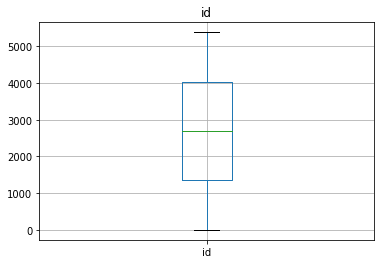

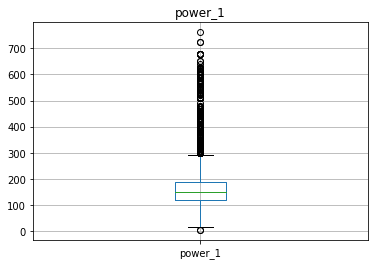

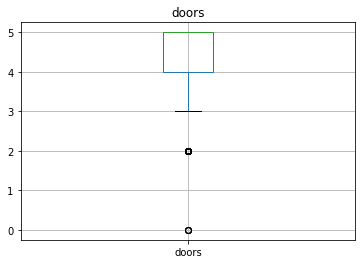

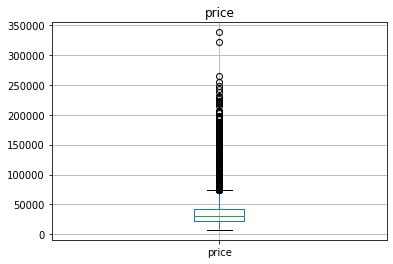

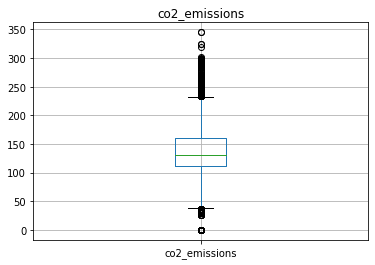

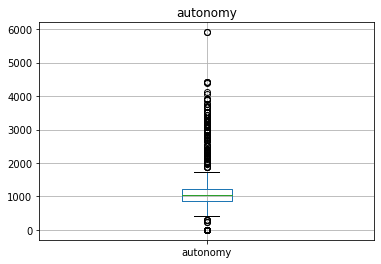

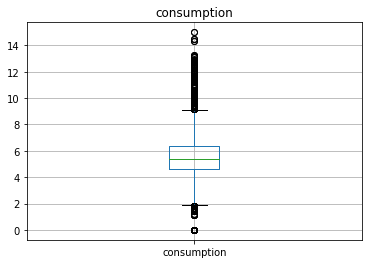

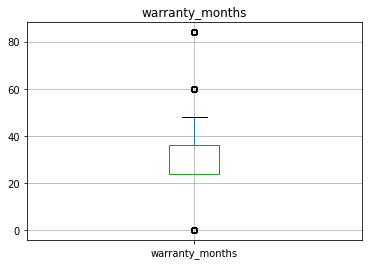

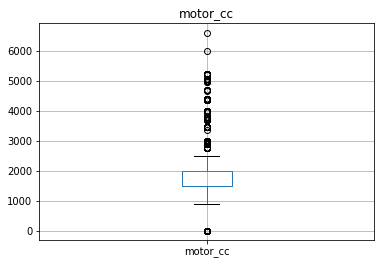

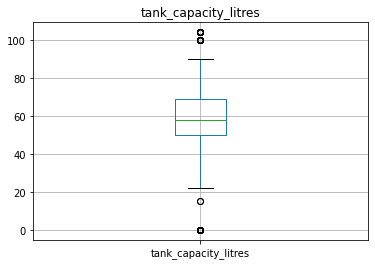

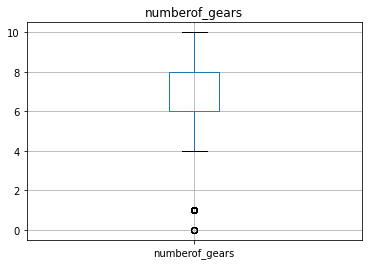

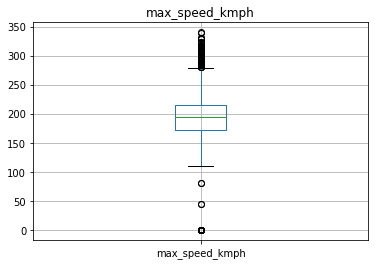

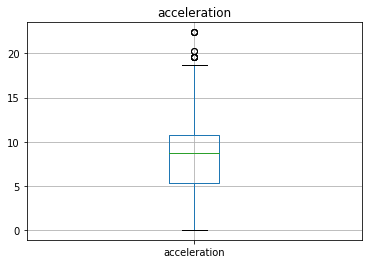

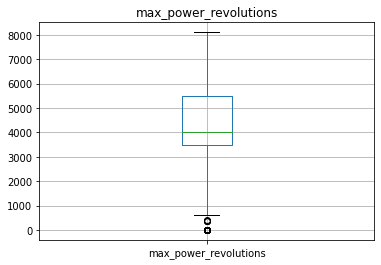

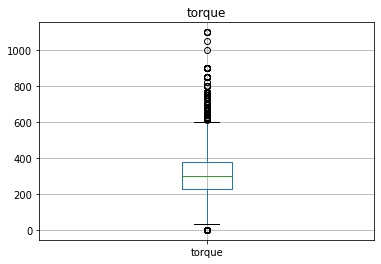

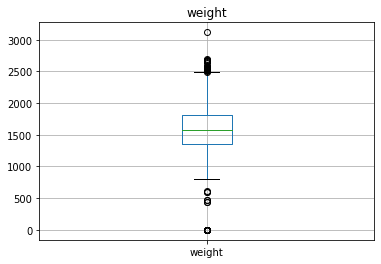

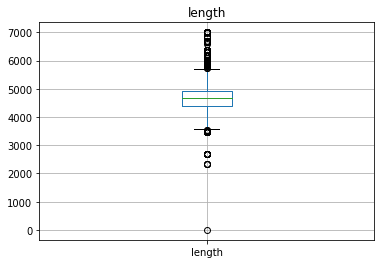

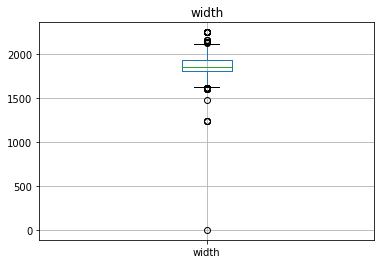

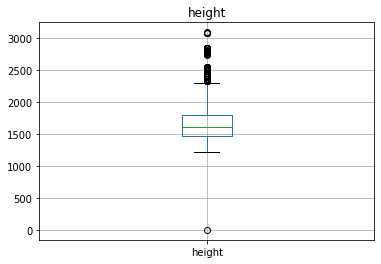

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# draw boxplots for each numerical column
for col in num_cols:
    plt.figure()
    df.boxplot([col])
    plt.title(col)

# show the plots
plt.show()

### Correlation Matrix

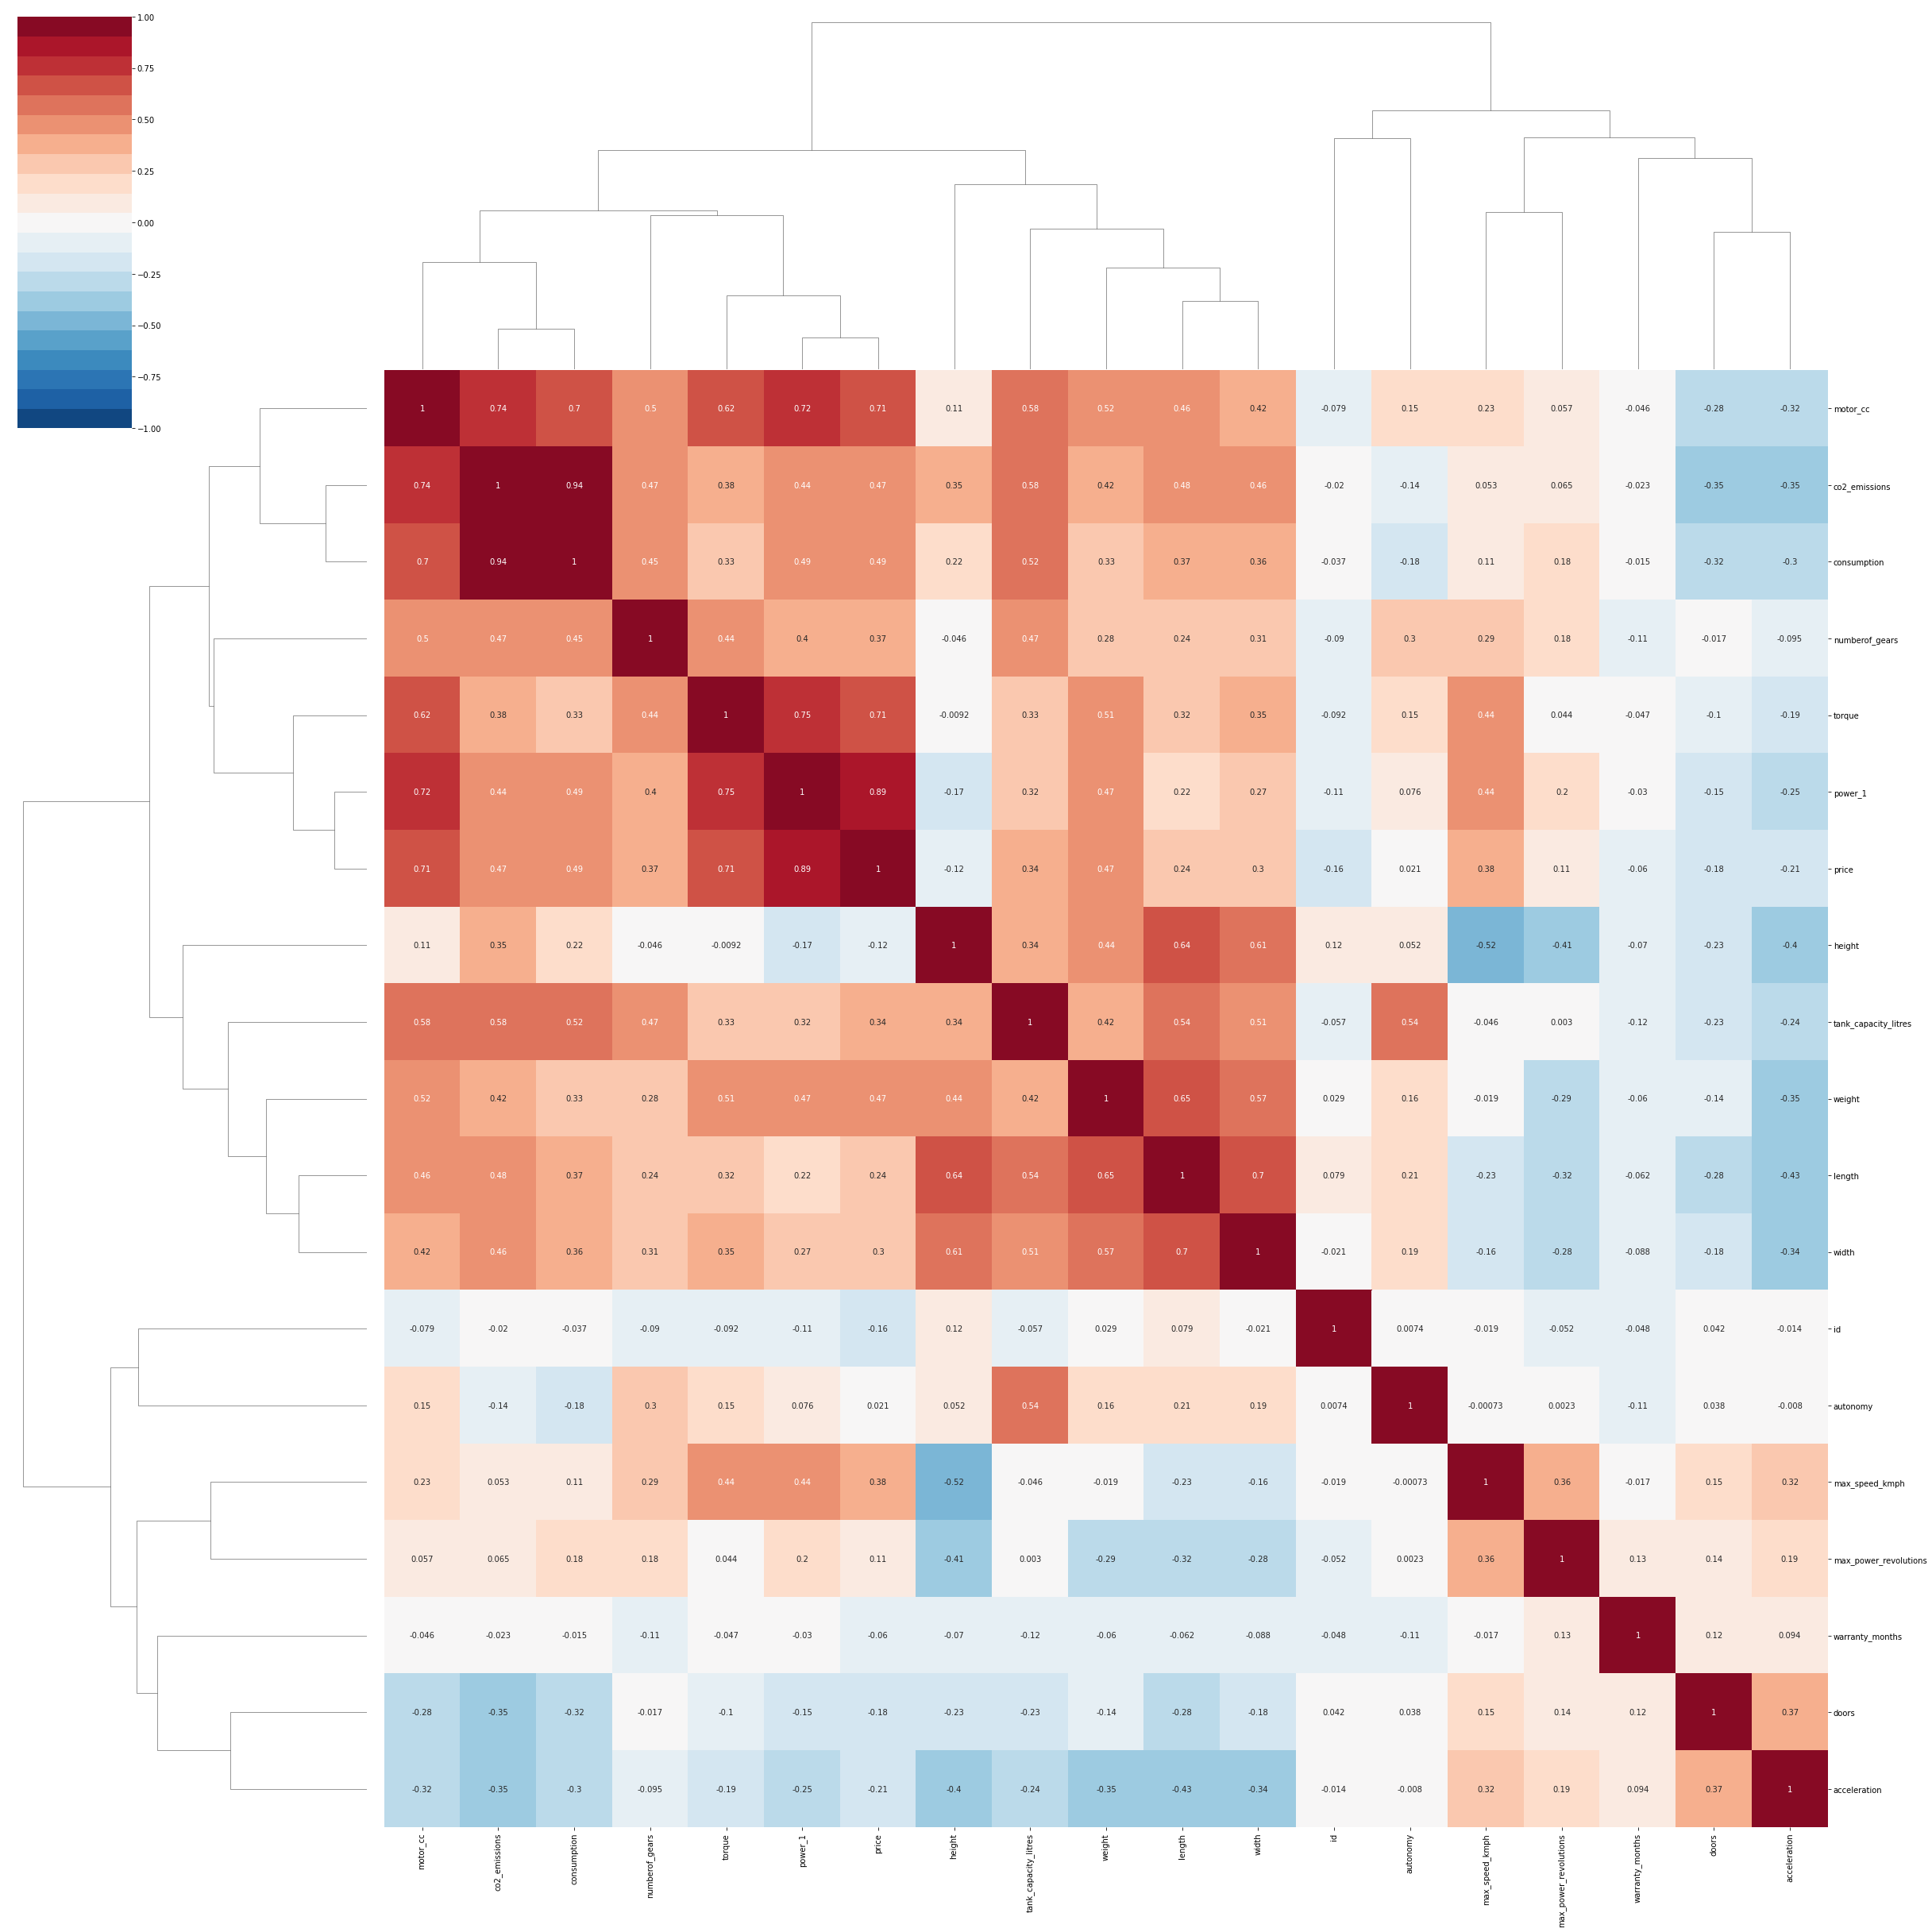

In [ ]:
#remove binary columns for preserving missing values, since including them inside correlation won't give us interesting insights
df_for_corr = df.drop(columns=['co2_emissions_missing', 'autonomy_missing',
       'consumption_missing', 'warranty_months_missing', 'motor_cc_missing',
       'tank_capacity_litres_missing', 'numberof_gears_missing',
       'max_speed_kmph_missing', 'acceleration_missing',
       'max_power_revolutions_missing', 'torque_missing', 'weight_missing',
       'length_missing', 'width_missing', 'height_missing', 'drive_missing',
       'transmission_missing', 'body_work_missing'])
g = sns.clustermap(df_for_corr.corr(), vmin=-1,vmax=1,cmap=sns.color_palette("RdBu_r", 21),annot=True)
fig = plt.gcf()
fig.set_size_inches(40, 40)
plt.show()

### Data scaling

Data scaling only for the numerical variables (But we are not replacing actual values with scaled values at the moment, because we will need original values for future statistical exploration. We could use these scaled values if later we dicide to use methods that use the distance between data points, such as KNN for example). scaled df will be saved in the variable df_scaled.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#create a list of numerical columns
numerical_cols = []
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        numerical_cols.append(col)

#subset the numerical columns
df_num = df[numerical_cols]

# Initialize the Scaler
scaler = MinMaxScaler()

# Scale the numerical columns
df_scaled = scaler.fit_transform(df_num)


### Questions:

- How does the average price of a car vary across different brands?

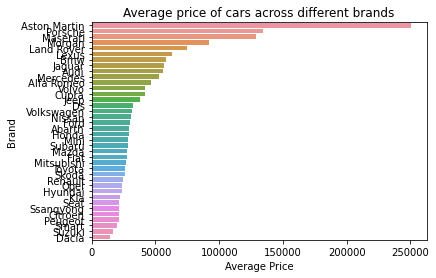

In [ ]:
df_brand = df.groupby('brand')['price'].mean()
df_brand.sort_values(ascending=False, inplace=True)

sns.barplot(x=df_brand.values, y=df_brand.index)
#sns.heatmap(data=df_brand, annot=True,x='values',y='index')

plt.xlabel('Average Price')
plt.ylabel('Brand')
plt.title('Average price of cars across different brands')
plt.show()


- How does the average horsepower of a car vary across different brands?

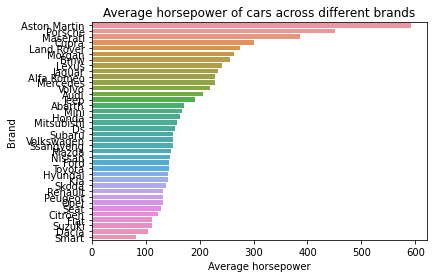

In [ ]:
df_brand = df.groupby('brand')['power_1'].mean()
df_brand.sort_values(ascending=False, inplace=True)

sns.barplot(x=df_brand.values, y=df_brand.index)
plt.xlabel('Average horsepower')
plt.ylabel('Brand')
plt.title('Average horsepower of cars across different brands')
plt.show()


- How does the warranty period of cars vary across different brands?

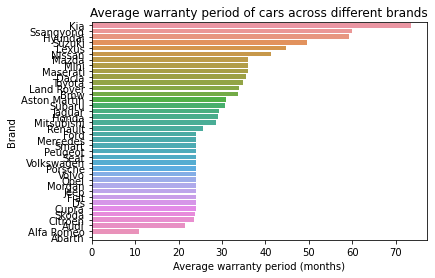

In [ ]:
df_warranty = df.groupby('brand')['warranty_months'].mean()
df_warranty.sort_values(ascending=False, inplace=True)

sns.barplot(x=df_warranty.values, y=df_warranty.index)
plt.xlabel('Average warranty period (months)')
plt.ylabel('Brand')
plt.title('Average warranty period of cars across different brands')
plt.show()


- How does the horsepower of cars vary across different transmission types?

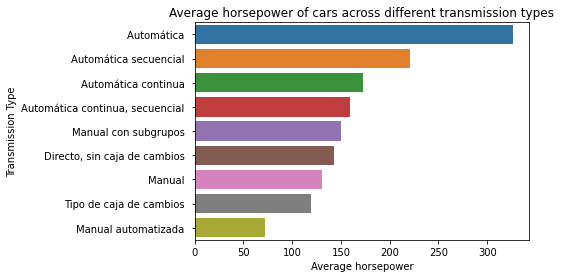

In [ ]:
df_transmission = df.groupby('transmission')['power_1'].mean()
df_transmission.sort_values(ascending=False, inplace=True)

sns.barplot(x=df_transmission.values, y=df_transmission.index)
plt.xlabel('Average horsepower')
plt.ylabel('Transmission Type')
plt.title('Average horsepower of cars across different transmission types')
plt.show()


- How does the fuel consumption of cars vary across different transmission types?

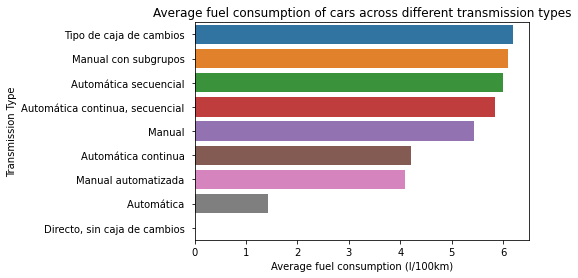

In [ ]:
df_transmission = df.groupby('transmission')['consumption'].mean()
df_transmission.sort_values(ascending=False, inplace=True)

sns.barplot(x=df_transmission.values, y=df_transmission.index)
plt.xlabel('Average fuel consumption (l/100km)')
plt.ylabel('Transmission Type')
plt.title('Average fuel consumption of cars across different transmission types')
plt.show()


### Converting categorical variables into numerical variables

In [ ]:
categorical_cols = []
for col in df.columns:
    if not np.issubdtype(df[col].dtype, np.number) and not np.issubdtype(df[col].dtype, bool):
        categorical_cols.append(col)
categorical_cols

['brand',
 'model',
 'version_1',
 'fuel',
 'co2',
 'drive',
 'transmission',
 'body_work']

In [ ]:
# exploring categorical variables
for col in categorical_cols:
    print("column - ", col, " - number of unique values - ", len(df[col].unique()), "\n   unique values - ", df[col].unique())

column -  brand  - number of unique values -  38 
   unique values -  ['Abarth' 'Alfa Romeo' 'Aston Martin' 'Audi' 'Bmw' 'Citroen' 'Cupra'
 'Dacia' 'Ds' 'Fiat' 'Ford' 'Honda' 'Hyundai' 'Jaguar' 'Jeep' 'Kia'
 'Land Rover' 'Lexus' 'Maserati' 'Mazda' 'Mercedes' 'Mini' 'Mitsubishi'
 'Morgan' 'Nissan' 'Opel' 'Peugeot' 'Porsche' 'Renault' 'Seat' 'Skoda'
 'Smart' 'Ssangyong' 'Subaru' 'Suzuki' 'Toyota' 'Volkswagen' 'Volvo']
column -  model  - number of unique values -  334 
   unique values -  ['Abarth - 595' 'Alfa romeo - Giulia' 'Alfa romeo - Giulietta'
 'Alfa romeo - Stelvio' 'Aston martin - DB11' 'Aston martin - DBS'
 'Aston martin - DBX' 'Aston martin - Vantage' 'Audi - A1'
 'Audi - A1 Citycarver' 'Audi - A3' 'Audi - A4' 'Audi - A4 Allroad'
 'Audi - A5' 'Audi - A6' 'Audi - A6 Allroad' 'Audi - A7' 'Audi - A8'
 'Audi - e-tron' 'Audi - Q2' 'Audi - Q3' 'Audi - Q5' 'Audi - Q7'
 'Audi - Q8' 'Audi - R8' 'Audi - TT' 'Bmw - i3' 'Bmw - Serie 1'
 'Bmw - Serie 2' 'Bmw - Serie 3' 'Bmw - Serie 4' 'Bmw 

#### Columns 'version_1' and 'model' give us redundant information that (in our humble opinion) doesn't offer us any important insight. These two columns also make Brand redundant. Therefore, we will stick with brand and eliminate 'version_1' and 'model' columns, since these two categorical variables also have a large amount of unique values, not giving us any useful information.

In [ ]:
df=df.drop(columns=['model','version_1'])

In [ ]:
#deleting removed columns from categorical_cols
removed_cols = ['model','version_1']
categorical_cols = [col for col in categorical_cols if col not in removed_cols]

### Exploring categorical varaibles

####Exploring fuel column

In [ ]:
df['fuel'].value_counts()

Diesel                                     2861
Gasolina                                   1993
Híbrido|Gasolina y corriente eléctrica      302
Eléctrico|Corriente eléctrica               131
Gasolina|Gasolina/gas                        82
Híbrido|Diesel y corriente eléctrica          7
Híbrido                                       2
Gasolina|Hidrogeno                            1
Name: fuel, dtype: int64

In [ ]:
# seems like Hidrogeno and Hibrido are not represented well enough and we won't be able to draw any interesting conclusions. Thus, we will remove them.

df = df[df.fuel != 'Híbrido']
df = df[df.fuel != 'Gasolina|Hidrogeno ']

In [ ]:
# now we will put all the rest of the unique values into three columns using multiple hot encoding
df['diesel'] = 0
df['gasolina'] = 0
df['electrica'] = 0

df['diesel'] = df['fuel'].apply(lambda x: 1 if 'iesel' in x else 0)
df['gasolina'] = df['fuel'].apply(lambda x: 1 if 'asolina' in x else 0)
df['electrica'] = df['fuel'].apply(lambda x: 1 if 'léctric' in x else 0)

df.columns

Index(['id', 'brand', 'power_1', 'doors', 'fuel', 'co2', 'price', 'drive',
       'transmission', 'co2_emissions', 'autonomy', 'consumption',
       'warranty_months', 'motor_cc', 'tank_capacity_litres', 'numberof_gears',
       'max_speed_kmph', 'acceleration', 'max_power_revolutions', 'torque',
       'body_work', 'weight', 'length', 'width', 'height',
       'consumption_missing', 'autonomy_missing', 'co2_emissions_missing',
       'warranty_months_missing', 'motor_cc_missing',
       'tank_capacity_litres_missing', 'numberof_gears_missing',
       'max_speed_kmph_missing', 'acceleration_missing',
       'max_power_revolutions_missing', 'torque_missing', 'weight_missing',
       'length_missing', 'width_missing', 'height_missing', 'drive_missing',
       'transmission_missing', 'body_work_missing', 'diesel', 'gasolina',
       'electrica'],
      dtype='object')

In [ ]:
# and we will delete the column fuel now
df = df.drop(columns=['fuel'])
categorical_cols.remove('fuel')

#### Exploring brand column

In [ ]:
df['brand'].value_counts() # we can see that the distribution is more or less exponential, we will use one hot encoding

Mercedes        397
Audi            385
Volkswagen      361
Peugeot         332
Ford            316
Nissan          290
Renault         280
Bmw             233
Land Rover      228
Opel            226
Fiat            199
Kia             197
Skoda           191
Volvo           190
Citroen         186
Mazda           181
Jaguar          165
Toyota          141
Hyundai         136
Seat             95
Porsche          73
Lexus            69
Ssangyong        56
Mini             53
Dacia            51
Jeep             49
Maserati         49
Honda            48
Ds               42
Subaru           34
Mitsubishi       28
Suzuki           24
Alfa Romeo       20
Abarth           20
Smart            15
Aston Martin      7
Morgan            6
Cupra             3
Name: brand, dtype: int64

#### Exploring drive column

In [ ]:
df['drive'].value_counts()   # we will just use one hot encoding here

Tracción delantera                         3644
Todo terreno tracción total permanente      747
Tracción trasera                            468
Tracción total permanente                   437
Todo terreno tracción total conectable       69
Tracción total conectable                    11
Name: drive, dtype: int64

#### Conversion of categorical variables into dummies

In [ ]:
# we will use one hot encoding because in NONE of these columns the order matters
dummies = pd.get_dummies(df[categorical_cols])
# merging with df
merged = pd.concat([df,dummies],axis=1)
# deleting categorical cols
df = merged.drop(categorical_cols, axis=1)

df

,id,power_1,doors,price,co2_emissions,autonomy,consumption,warranty_months,motor_cc,tank_capacity_litres,...,body_work_Convertible,body_work_Coupe,body_work_Furgon,body_work_Monovolumen,body_work_Pick-Up,body_work_Pick-Up Doble Cabina,body_work_Roadster,body_work_Stationwagon,body_work_Targa,body_work_Todo Terreno
0,1,145,3,20934.0,155.0,583.3,6.0,0,1368.0,35.0,...,0,0,0,0,0,0,0,0,0,0
1,2,145,2,22834.0,156.0,583.3,6.0,0,1368.0,35.0,...,1,0,0,0,0,0,0,0,0,0
2,3,165,3,23934.0,157.0,583.3,6.0,0,1368.0,35.0,...,0,0,0,0,0,0,0,0,0,0
3,4,165,2,25834.0,158.0,583.3,6.0,0,1368.0,35.0,...,1,0,0,0,0,0,0,0,0,0
4,5,165,3,25884.0,157.0,583.3,6.0,0,1368.0,35.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,5375,250,5,61318.0,163.0,1000.0,7.1,24,1969.0,71.0,...,0,0,0,0,0,0,0,0,0,1
5375,5376,390,5,63099.0,48.0,3333.3,2.1,24,1969.0,70.0,...,0,0,0,0,0,0,0,0,0,1
5376,5377,390,5,64584.0,48.0,3333.3,2.1,24,1969.0,70.0,...,0,0,0,0,0,0,0,0,0,1
5377,5378,390,5,68380.0,48.0,3333.3,2.1,24,1969.0,70.0,...,0,0,0,0,0,0,0,0,0,1


### Recieving the final dataframe and saving as csv

In [ ]:
# since all the columns ending with ' _missing' we made for the purpose of remembering which rows had missing values, we will not
# need it in the final CSV so we will drop them (we already have 112 columns which is a bit too much)
missing_cols =[]
for col in df.columns:
  if 'missing' in col:
    missing_cols.append(col)
df = df.drop(columns = missing_cols)

# now we have slightly less columns
print(len(list(df.columns)))

94


In [ ]:
df.to_csv('cars_2021_v0.csv')

In [ ]:
df.to_csv('final_df.csv', index=False)

from google.colab import files

files.download('final_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Summary and Conclusion

The dataset we received to perform exploratory data analysis on, or EDA for short, contained many different characteristics about vehicles belonging to a variety of car brands. There were 27 different columns present, and there 4081 different vehicles, or unique IDs, in this dataset.  The data types present in this dataset are both categorical and numerical in nature. In order to ensure that the dataset could be cleared of missing values, we used imputation techniques to handle them. There were missing values in both ‘obj’ and ‘float64’ data types, and each one had a different approach to handle said missing values. Mean imputation based on the non-missing data was performed for each numerical data type, and mode imputation was done for the categorical variables.

 We also had to optimize certain aspects of the data set in order to perform further EDA on it. For example, we had to convert the currency symbol in the ‘price’ column into a float in order to analyze the prices as numerical values.

In order to detect outliers, we created a new dataframe ‘df_without_outliers’ and checked 
The function we created iterated through each column of the dataframe, and if the data type was numeric then it was appended to a list. The z-score was then calculated for the items, and threshold of 3 standard deviations away from the distribution implied that a datapoint was a ‘true’ outlier. After detecting the rows with outliers, the shape of the ‘df_without_outliers was reduced from (5379 x 45) to (4081 x 45).


In order to gain a visual representation of data distribution, we generated some boxplots. The shape of these boxplots allows us to infer that the data is very left-skewed, and there were many datapoints outside of the interquartile range. Keeping this in mind, we do not believe that the outliers should be deleted because not only do they account for a considerable portion of the data, but there is also no reason to suspect that they were incorrectly measured or reported. Had there been reasonable suspicion that the data was entered incorrectly then they would have been handled in an appropriate manner; but since there is a lack of conclusive evidence corroborating this idea then they remained in the dataset. 

In order to identify potential correlations between seemingly arbitrary features of the dataset, we implemented a correlation matrix by removing binary columns in order to preserve missing values.

Upon generating the correlation matrix, we found that most of the data points 'mapped' against each other were either virtually unrelated (linearly) or had a relatively weak correlation. There were a couple of high correlation values found, though, and these values will be expanded upon in the ML tasks proposals. The pre-existing high correlation between these predictor variable candidates makes them excellent starting points for a linear regression ML task.

After this process, we scaled the numerical values of the dataset in order to gain insight on how far some data points are with respect to others. We did not scale the entire dataset and modify its values; instead, we created a new dataframe, ‘df_scaled’, in order to leave the original intact while still being able to explore the data further.

We chose to drop the ‘model’ and ‘version_1’ columns from our data frame because the information they offered was redundant. There are so many different models a vehicle brand can have, and we believe that the insights that can be gained from this dataset are more general in nature; there is no need to identify the specific type of model in overall data processing and algorithm design. Since the order of the variables in the categorial columns is arbitrary, we implemented one hot encoding to convert the aforementioned categorical variables into dummy variables as well. This numerical breakdown allowed for the dataset to be more easily manipulated. 

The fuel column had a variety of different entries that we had to separate; in order to accomplish this we used ‘multiple hot encoding’ for the aforementioned column. We divided the column into three separate columns, and the hybrid type of vehicle reported as ‘1’, or ‘true’, for both of those columns in the same row. 

Prior to saving the CSV file, we removed the column that preserved the information about the missing values that were imputated because they would be useless for any algorithm built. 

When generating plots, we felt that it was important to first ask general questions to guide our data analysis. Based on the visual representation of the data from the graphs, we could then narrow our focus into more semantic aspects of the dataset. We initially began by visualizing the average price of cars across different brands listed in the dataset, and we found that the prices between them varied greatly. The difference in averages between different brands in the dataset was around 230,000 euros from the lowest mean price for Dacia and the highest mean price for Aston Martin.  This particular column was very left-skewed because the values for Aston Martin were much greater at an average of 250,000 euros in comparison to the second highest average of Porsche which landed at around 150,000 euros. 

Afterwards, we generated a graph to visualize how the average horsepower of a brand varied with respect to other brands. This distribution was also left-skewed much like the aforementioned one— this could perhaps imply that there is some correlation between them. Something noteworthy is that the spread of this latter bar graph has a similar distribution to the former graph of average vehicle price across brands. The greatest horsepower of cars on average per brand also belonged to Aston Martin, and the lowest average horsepower per brand belonged to Smart. Dacia overtook Smart in this particular instance, but Dacia is still in the lowest percentiles of horsepower in this dataset. We can find a similar trend throughout the distribution— for example, we can see that Dacia, Peugeout, Suzuki and Citroen are lacking in both average horsepower and average price. This can imply that the greater the horsepower of a vehicle, the more likely it is to belong to a pricey brand.


The distribution for the average warranty period of cars across different brands did not follow a distribution similar to either of the subsets mentioned above. There seems to be a minimal correlation, then, on how the average warranty of a brand is affected by its costliness. The longest average warranty period for a brand was Kia, with a value of 72 months, and it was on the lower end of both of the aforementioned distributions. 

Another facet of the dataset which we wanted to explore further was how a target variable--- the transmission type--- affected the average horsepower of any vehicle. The type of transmission a car has affects its horsepower because the transmission is the apparatus that mitigates the energy ‘lost’ in the combustion and energy transfer process when running a vehicle. The greater a vehicle’s horsepower, the greater the speed at which it can travel. Since we are hoping to determine whether the type of transmission can affect the horsepower of a given vehicle, we can assume that the two variables are initially independent to interpret the plot generated from the subset of the data.  In order to generate this plot, we sorted the transmission values associated with a specific brand with respect to the mean horsepower associated with that particular transmission. Then, we generated a plot using 'matplotlib' and organized the bins associated with each type of transmission in descending order. What we found, generally speaking, is that automatic transmission vehicles have significantly greater horsepower on average than their manual transmission counterparts.

Much like how the transmission of a car is what allows it to reach its top speeds, the fuel a car consumes allows it to travel at varying speeds in different types of terrains. In order to visualize this, we plotted the average fuel consumption of a car in units of (L/100km) with respect to the varying types of transmissions. Based on the graph generated, we can determine that there isn’t a strong trend between how the type of transmission can affect a vehicle’s fuel consumption. 

In conclusion, the EDA we performed on the provided dataset allowed us to learn much about it that we would never have been able to infer from the '.csv' file alone. We were able to clean the dataset to make it easier to manipulate, generate visual aids and graphs in order to understand how related different variables in the dataset are, and can use this information in order to develop further hypotheses to test by undertaking ML tasks. Practicing these skills helps us practice using the tools necessary to becoming ML engineers with a strong foundation. 


# ML Tasks Candidates Based on Our EDA

*   One model that we could generate would be to see if there is a relationship 
between a certain type of transmission and the value of the vehicle’s torque.
  *   Generally speaking, a vehicle’s horsepower is dependent on its torque— the greater a vehicle’s horsepower, the greater its torque will be. Earlier, we mentioned that we generated plots that allowed us to infer that there is a relationship between the average horsepower of a vehicle and its type of transmission; because of this, it is safe to infer that we could also gain insight as to how this point is reflected in the dataset through generating a model. 
  *   We believe that, first and foremost, the varying types of transmissions could be split into one of two categories by practicing selection (the transmission will either be automatic or manual) After dividing the training set and generating a rudimentary model that could predict whether a vehicle has ‘automatic’ or ‘manual’ transmission based on a given torque, the model could be fine tuned by introducing subdivisions of the column of interest based on the initial partition. 


The remaining two models we will propose are inferred from the generation of the correlation matrix. The correlation matrix demonstrated that there is a great distribution between the relationships predicted for all sorts of variables present within the dataset. Of course— when a variable was mapped against itself its correlation coefficient was going to be 1. Getting a value this high is statistically improbable for any other scenario. Keeping this in mind, the fact that we managed to extrapolate two separate relationships with correlation coefficients over 0.8 is noteworthy. The two candidates for modeling are ‘power_1’ vs ‘price’ with an r-value of 0.89, and ‘CO2_emissions’ vs ‘consumption’ with an r-value of 0.94. 


*   94% of the dataset’s carbon emissions and consumption can be explained by the correlation matrix, and because of this extraordinarily high value we believe that these two variables can be used as predictor variables for a machine learning task. 

  *   Based on this dataset, we can infer that carbon dioxide emissions and consumption have a strong positive relationship, and perhaps we could map this trend with respect to time and see if technology has a trend to advance to where carbon dioxide emissions can be mitigated in spite of high fuel consumption. 
  *   In order to generate this model, we would need to create a new column in this dataset that merges the units of consumption and carbon dioxide emissions. 
  *   After creating this new explanatory variable, we could visualize the target variable by generating a scatter plot with ‘year’ as the independent variable and a new inferred unit, ‘consumption in kilometers/liter over kilotons of CO2’, mapped as the dependent variable. It is important to note that although the units were not explicitly stated in the dataset, an online search helped us determine what specific units would correlated to these particular subsets of data. The nature of this inference leads us to believe that a linear model would be best to build for this task. 

*   Finally, the third proposed ML task that could be done with this cleansed data is one which can explain the price of a given vehicle based on its power.
  *   These two variables have an r value of 0.89 based on the correlation matrix generated. 
  *   In this proposed model, the explanatory variable would be the power and the target variable to be predicted would be the price.
  *   Logically, this relationship makes sense because a car which can run at quicker speeds has to have components which are both more durable and adapted to the increased temperatures that burning fuel at a quicker rate can cause. These components have to be more specialized than anything with which a car with typical horsepower from a range of 180-200 hp. Quicker and more powerful cars also tend to look more unique, posessing trademark features which allow them to be recognizable and emblematic for a brand. A linear regression could be built for these two variables given that the r-value is so high. 





